In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

from skimage import io, exposure
from matplotlib import patches as mpatches

In [3]:
cd ../experiments/

/run/media/dhruv/Gryffindor/Project/Cybergut/Implementation/experiments


In [4]:
import crf

In [5]:
C = crf.DenseCRF((7, 7), (0.1))

In [23]:
img = cv2.imread('Outputs/2-3-up/extracted_cells/C - 1(fld 095 wv TL-Brightfield - dsRed)/original.png', cv2.IMREAD_ANYDEPTH)

probst = np.load('Outputs/2-3-up/probs/C - 1(fld 095 wv TL-Brightfield - dsRed).npy')

In [24]:
probs = np.zeros((2, 512, 512), np.float32)
probs[0] = probst[0]+probst[2]
probs[1] = probst[1]

probs2 = np.zeros((2, 512, 512), np.float32)
probs2[0] = probst[0]
probs2[1] = probst[1]+probst[2]

In [9]:
CC = C.get_crf(img, probs)

In [26]:
Q, t1, t2 = CC.startInference()

In [27]:
for i in range(50):
    CC.stepInference(Q, t1, t2)
    res = np.argmax(Q, axis=0).reshape(512, 512).astype(np.uint8)
    res *= 255
    cv2.imwrite(f'/tmp/{i}.png', res)

In [16]:
from skimage import  measure, color, morphology, io

In [25]:
msk = probs.argmax(axis=0)*255

In [10]:
cv2.imwrite('/tmp/mask.png', msk.astype(np.uint8))

True

In [26]:
msk2 = morphology.opening(msk, morphology.disk(2))

In [19]:
cv2.imwrite('/tmp/mask2.png', msk2.astype(np.uint8))

True

In [27]:
label = measure.label(msk2, connectivity=2)

/home/dhruv/.local/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


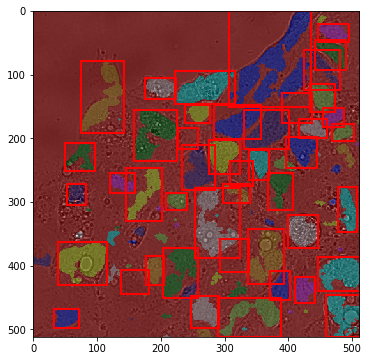

In [28]:
image_label_overlay = color.label2rgb(label, image=img)
C = crf.DenseCRF((10, 10), (.001, ), 5)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for i, region in enumerate(measure.regionprops(label)):
    if region.area >= 500:
        minr, minc, maxr, maxc = region.bbox
        img_n = img[minr:maxr, minc:maxc]
        prb_n = probs2[:, minr:maxr, minc:maxc]
        res = C.infer(img_n, prb_n, 100).argmax(0)*255
        res = res.reshape(img_n.shape)
        ov1 = color.label2rgb(prb_n.argmax(0), image=img_n)
        ov2 = color.label2rgb(res, image=img_n)
        io.imsave(f'/tmp/test/{i}_1.png', ov1)
        io.imsave(f'/tmp/test/{i}_2.png', ov2)
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)


In [64]:
CC =C.get_crf(img_n, prb_n)

In [74]:
for i in range(2, 10):
    for j in [0.01, 0.1, 1.0, 10]:
        for c in range(3,4):
            C = crf.DenseCRF((i, i), (j, ), c)
            res = C.infer(img_n, prb_n, 2)
            res = res.reshape(-1, 53, 96)
            cv2.imwrite(f'/tmp/test/{i}-{j}-{c}.png', (res.argmax(0)*255).astype(np.uint8))

In [71]:
img_n.shape

(53, 96)

In [75]:
img_n.dtype

dtype('uint16')

In [77]:
cv2.imwrite('/tmp/img.png', img_n)

True

In [83]:
ov1.shape

(53, 96, 3)

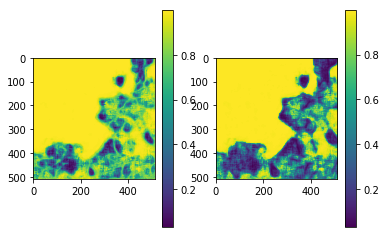

In [29]:
plt.subplot(1, 2, 1)
plt.imshow(probs[0])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(probs2[0])
plt.colorbar()

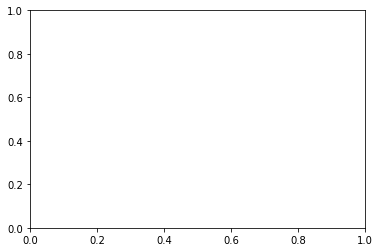

In [27]:
x = plt.subplots()

In [28]:
x

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ae93195f8>)

# On HEK new Experiments

In [5]:
img = cv2.imread('/home/dhruv/Projects/cybergut/Cybergut/Data/20-9-18/trained/val111/orig.tif', cv2.IMREAD_ANYDEPTH)
probst = np.load('/home/dhruv/Projects/cybergut/Cybergut/Data/20-9-18/trained/val111/stiched.npy')
img = exposure.equalize_hist(img)
nimg = probst.argmax(axis=0).astype(np.uint8)*255
cv2.imwrite(f'/tmp/out.png', nimg)

True

In [7]:
c = crf.DenseCRF((5,5), (10000))
d = c.get_crf(img, probst)
Q, tmp1, tmp2 = d.startInference()
for i in range(2,10):
    d.stepInference(Q, tmp1, tmp2)
    nimg = np.argmax(Q, axis=0).astype(np.uint8).reshape(2064, 2064)*255
    cv2.imwrite(f'/tmp/out_{i}.png', nimg)